In [34]:
import pandas as pd

# Correct relative path
df = pd.read_csv('../data/diagnoses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45152 entries, 0 to 45151
Data columns (total 95 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 45152 non-null  object
 1   Dx_10370003        45152 non-null  bool  
 2   Dx_106068003       45152 non-null  bool  
 3   Dx_111288001       45152 non-null  bool  
 4   Dx_11157007        45152 non-null  bool  
 5   Dx_111975006       45152 non-null  bool  
 6   Dx_13640000        45152 non-null  bool  
 7   Dx_164865005       45152 non-null  bool  
 8   Dx_164873001       45152 non-null  bool  
 9   Dx_164889003       45152 non-null  bool  
 10  Dx_164890007       45152 non-null  bool  
 11  Dx_164896001       45152 non-null  bool  
 12  Dx_164909002       45152 non-null  bool  
 13  Dx_164912004       45152 non-null  bool  
 14  Dx_164917005       45152 non-null  bool  
 15  Dx_164930006       45152 non-null  bool  
 16  Dx_164931005       45152 non-null  bool 

## Plotting frequency of each disease

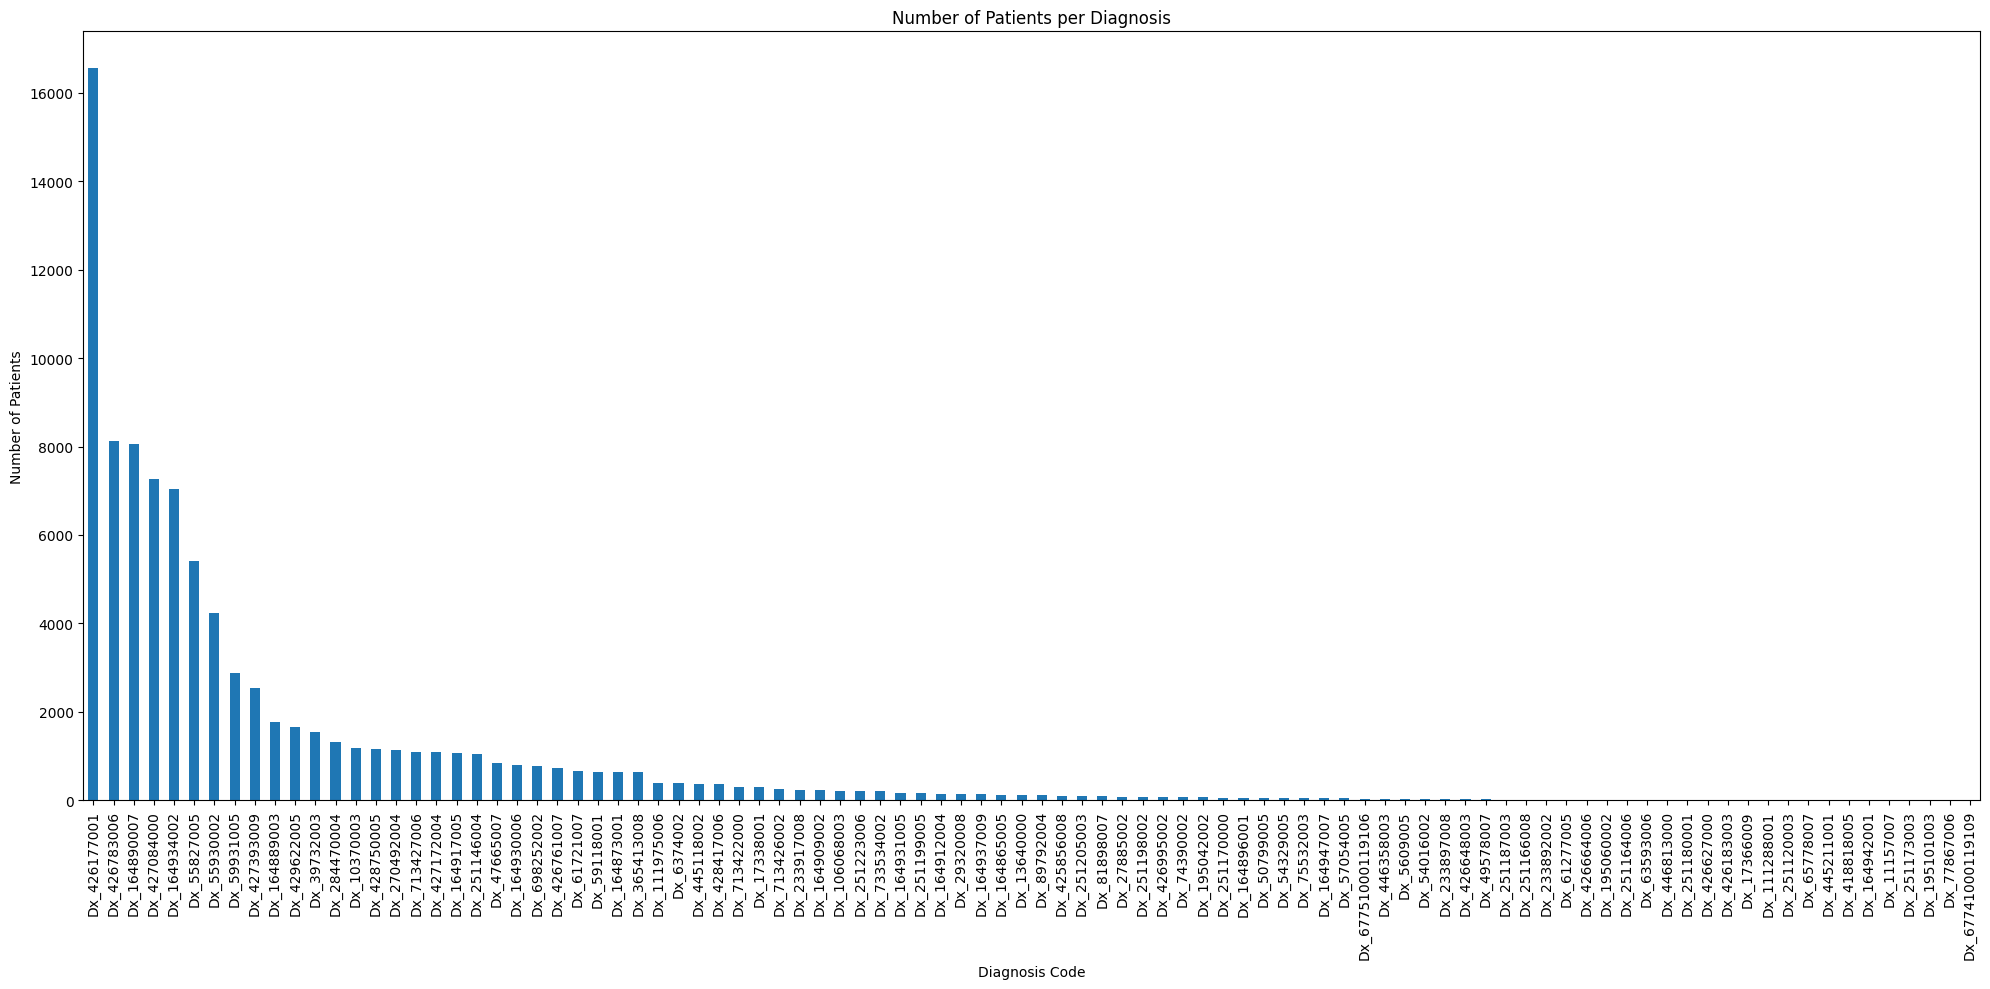

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# If not, load it first, e.g., df = pd.read_csv('your_file.csv')

# Drop the ID column to focus only on diagnosis columns
diagnosis_columns = df.columns.drop('ID')

# Count how many patients have each diagnosis (True values)
diagnosis_counts = df[diagnosis_columns].sum().sort_values(ascending=False)

# Plot the counts
plt.figure(figsize=(20, 10))
diagnosis_counts.plot(kind='bar')
plt.title('Number of Patients per Diagnosis')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Displaying Diseases only appearing in >=10% of patients

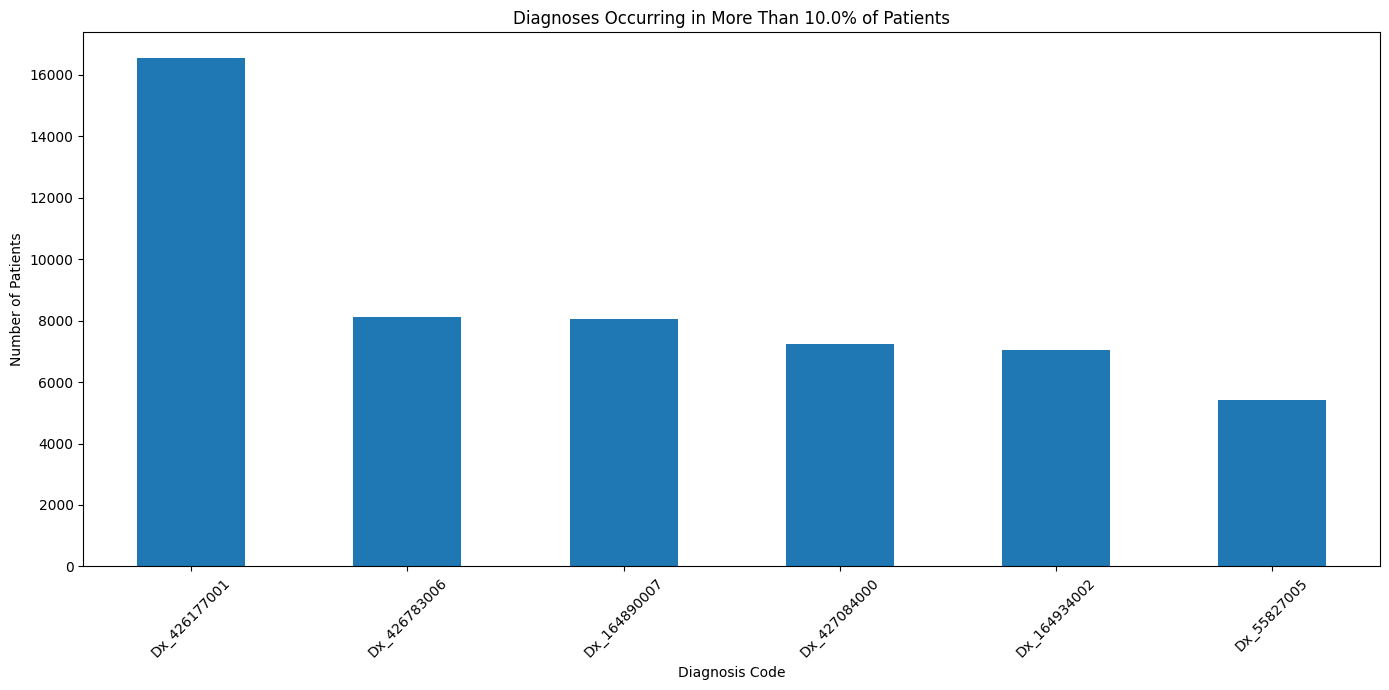

In [36]:
import matplotlib.pyplot as plt

# Calculate total number of patients
total_patients = len(df)

# Set percentage threshold
percentage_threshold = 0.1 

# Convert percentage threshold into an absolute patient count
count_threshold = total_patients * percentage_threshold

# Filter diagnoses that have more than this number of patients
filtered_counts = diagnosis_counts[diagnosis_counts > count_threshold]

# Plot
plt.figure(figsize=(14, 7))
filtered_counts.plot(kind='bar')
plt.title(f'Diagnoses Occurring in More Than {percentage_threshold*100:.1f}% of Patients')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
# Diagnosis names (column names) that passed the threshold
selected_diagnoses = list(filtered_counts.index)

df_10 = df[['ID'] + list(filtered_counts.index)]

display(df_10)

,ID,Dx_426177001,Dx_426783006,Dx_164890007,Dx_427084000,Dx_164934002,Dx_55827005
0,JS00001,False,False,False,False,True,False
1,JS00002,True,False,False,False,True,False
2,JS00004,True,False,False,False,False,False
3,JS00005,False,False,True,False,False,False
4,JS00006,True,False,False,False,False,False
...,...,...,...,...,...,...,...
45147,JS45548,False,False,False,False,False,False
45148,JS45549,False,False,False,False,False,False
45149,JS45550,False,False,False,False,False,False
45150,JS45551,False,False,False,False,False,False


## Displaying Diseases only appearing in >=1% of patients

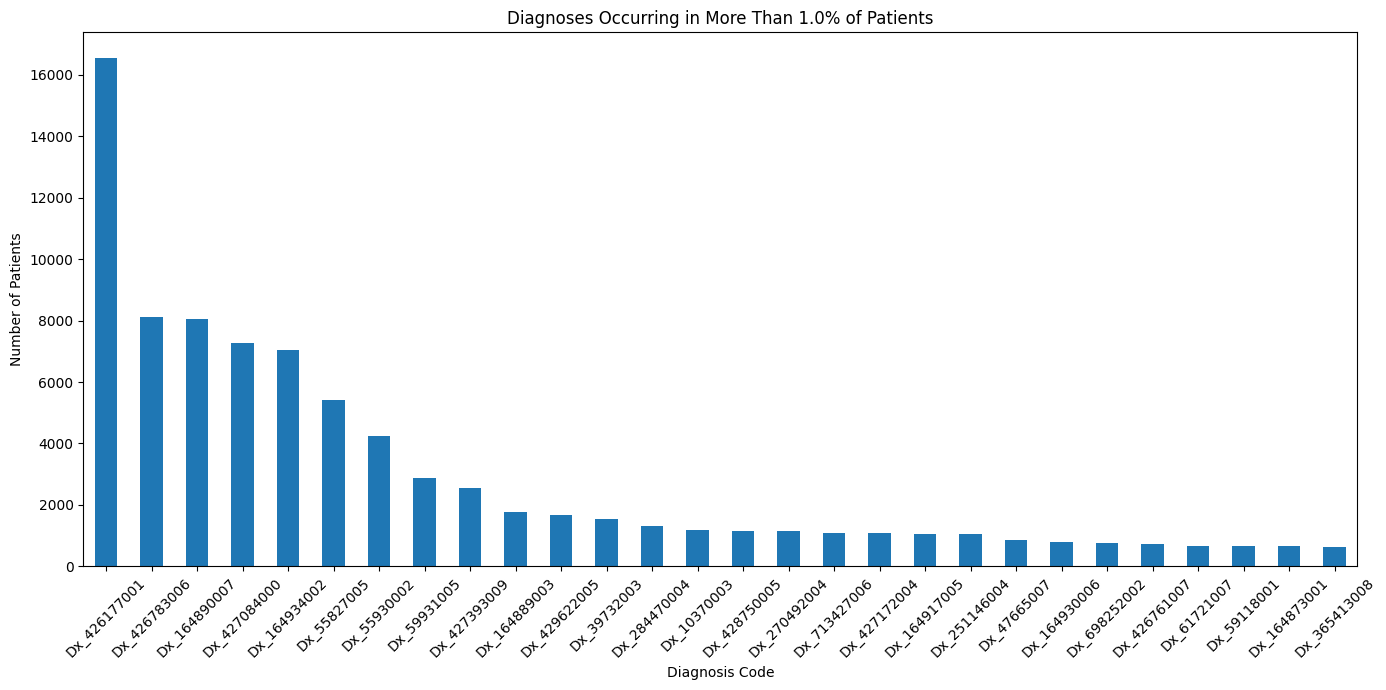

In [38]:
import matplotlib.pyplot as plt

# Calculate total number of patients
total_patients = len(df)

# Setpercentage threshold
percentage_threshold = 0.01  

# Convert percentage threshold into an absolute patient count
count_threshold = total_patients * percentage_threshold

# Filter diagnoses that have more than this number of patients
filtered_counts = diagnosis_counts[diagnosis_counts > count_threshold]

# Plot
plt.figure(figsize=(14, 7))
filtered_counts.plot(kind='bar')
plt.title(f'Diagnoses Occurring in More Than {percentage_threshold*100:.1f}% of Patients')
plt.xlabel('Diagnosis Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [39]:
# Diagnosis names (column names) that passed the threshold
selected_diagnoses = list(filtered_counts.index)

df_1 = df[['ID'] + list(filtered_counts.index)]

display(df_1)

,ID,Dx_426177001,Dx_426783006,Dx_164890007,Dx_427084000,Dx_164934002,Dx_55827005,Dx_55930002,Dx_59931005,Dx_427393009,...,Dx_164917005,Dx_251146004,Dx_47665007,Dx_164930006,Dx_698252002,Dx_426761007,Dx_61721007,Dx_59118001,Dx_164873001,Dx_365413008
0,JS00001,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,JS00002,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,JS00004,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,JS00005,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,JS00006,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,JS45548,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45148,JS45549,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45149,JS45550,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45150,JS45551,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Move the DFs to new CSVs

In [41]:
df_1.to_csv('../data/diagnoses_1.csv')
df_10.to_csv('../data/diagnoses_10.csv')